In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
os.listdir('C:\RACHEL\SELF LEARNING\PYTHON\Data practice')

['supermarket_sales - Sheet1.csv']

In [7]:
sales=pd.read_csv(r'C:\RACHEL\SELF LEARNING\PYTHON\Data practice\supermarket_sales - Sheet1.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [12]:
type(sales['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
from pandas import to_datetime

In [11]:
sales['Date']=to_datetime(sales['Date'])

In [13]:
sales['Date'].dtype

dtype('<M8[ns]')

In [14]:
type(sales['Time'][0])

str

In [15]:
sales['Time']=to_datetime(sales['Time'])

In [16]:
type(sales['Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
def fetch_att(x):
    day=x.day
    month=x.month
    year=x.year
    #return[day,month,year]
    return pd.Series([day,month,year])

In [23]:
sales[['day','month','year']]=sales['Date'].apply(fetch_att)

In [24]:
sales.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-01-06 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-01-06 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-01-06 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019


In [26]:
#sales['Date'].apply(lambda x: x.day)
#sales['Date'].dt.day

In [29]:
sales['hour']=sales['Time'].apply(lambda x: x.hour)
#sales['Time'].apply(lambda x: x.day)

In [32]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000
day,1000.0,15.256000,8.693563,1.000000,8.000000,15.000000,23.000000,31.000000
month,1000.0,1.993000,0.835254,1.000000,1.000000,2.000000,3.000000,3.000000


In [34]:
np.round(sales.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,hour
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.06,-0.03,NaN,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.04,-0.01,NaN,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.04,NaN,-0.03
day,0.06,-0.04,-0.00,-0.00,-0.00,NaN,-0.00,-0.01,1.00,-0.12,NaN,0.02
month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,-0.12,1.00,NaN,0.04


<AxesSubplot: >

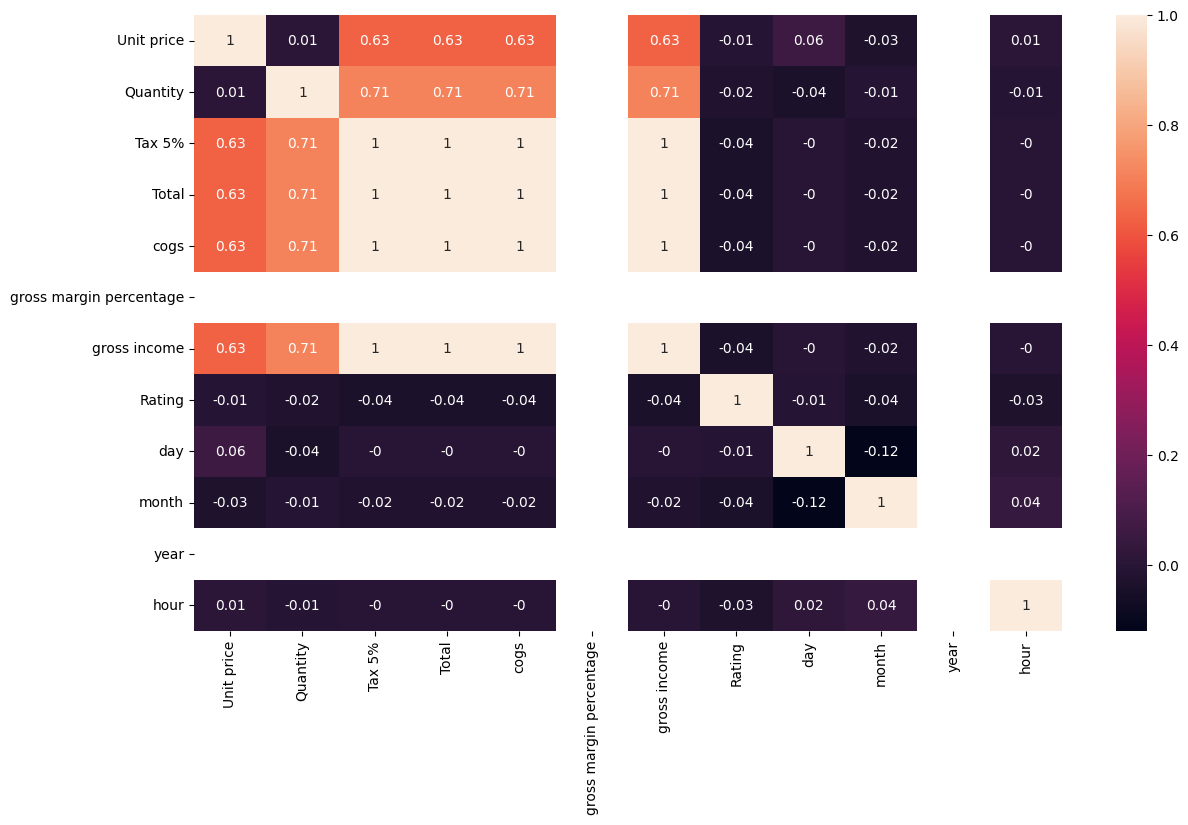

In [41]:
plt.figure(figsize=(14,8))
sns.heatmap(np.round(sales.corr(),2),annot=True)

<AxesSubplot: xlabel='Tax 5%', ylabel='gross income'>

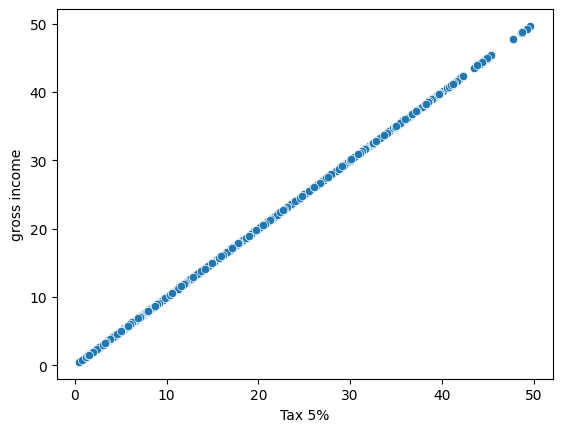

In [42]:
sns.scatterplot(x="Tax 5%",y='gross income',data=sales)

<AxesSubplot: xlabel='Quantity', ylabel='cogs'>

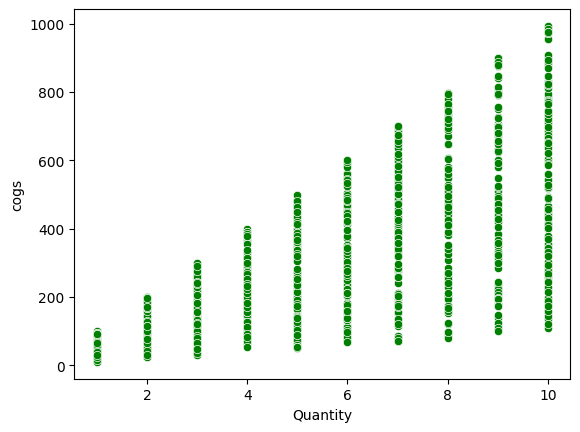

In [43]:
sns.scatterplot(x="Quantity",y='cogs',data=sales,color='green')

<AxesSubplot: xlabel='Quantity', ylabel='cogs'>

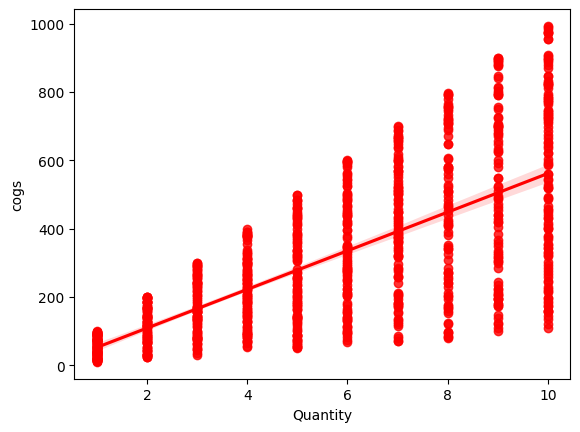

In [44]:
sns.regplot(x='Quantity',y='cogs',data=sales,color='red')

In [45]:
sales['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [46]:
sales.groupby(['City'])['gross income'].median()

City
Mandalay     12.04200
Naypyitaw    12.92475
Yangon       11.46800
Name: gross income, dtype: float64

In [51]:
sales['Rating'].mean()
#np.mean(sales['Rating'])

6.9727

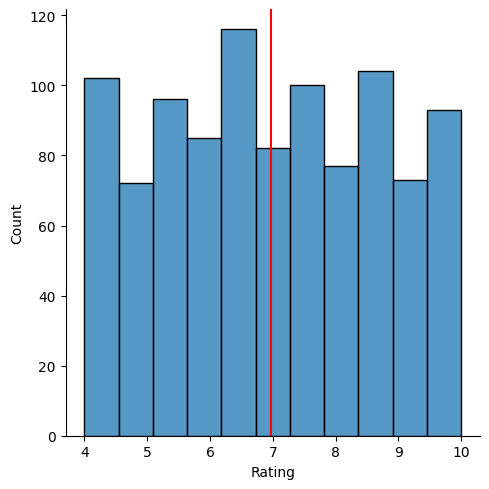

In [55]:
sns.displot(sales['Rating'],kde=False)
plt.axvline(x=np.mean(sales['Rating']),c='red',label='Avg rating')

In [56]:
def return_countplot(column,hue_name=None):
    return sns.countplot(x=column,data=sales,hue=hue_name)


In [57]:
def return_boxplot(x_column,y_column):
    return sns.boxplot(x=x_column,y=y_column,data=sales)

In [58]:
def return_lineplot(x_column,y_column):
    return sns.lineplot(x=x_column,y=y_column,data=sales)

In [59]:
def return_rel_plot(x_col,y_col,col_name=None,row_name=None,rel_type=None,hue_name=None,style_name=None):
    sns.relplot(x=x_col,y=y_col,col=col_name,row=row_name,kind=rel_type,hue=hue_name,style=style_name,data=sales)

<AxesSubplot: xlabel='Branch', ylabel='Rating'>

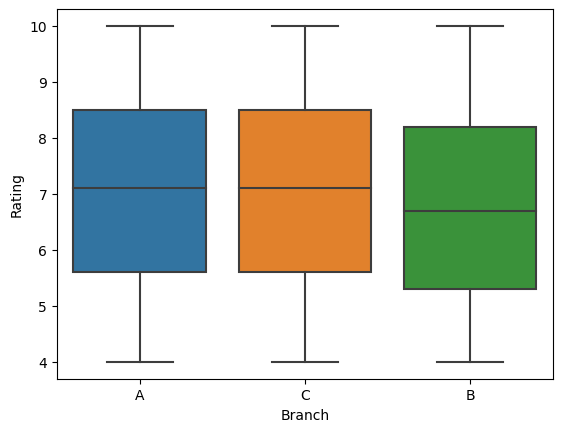

In [60]:
return_boxplot('Branch','Rating')

<AxesSubplot: xlabel='hour', ylabel='Quantity'>

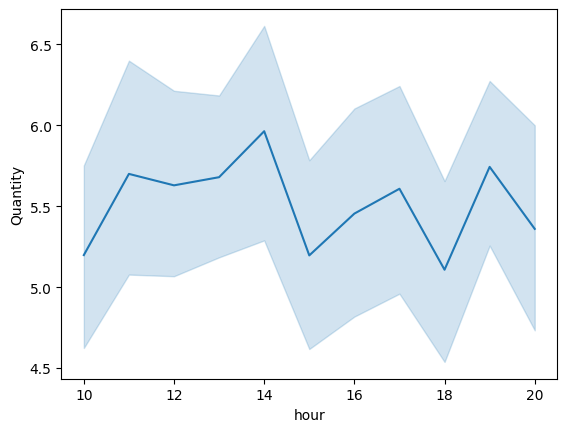

In [61]:
return_lineplot('hour','Quantity')

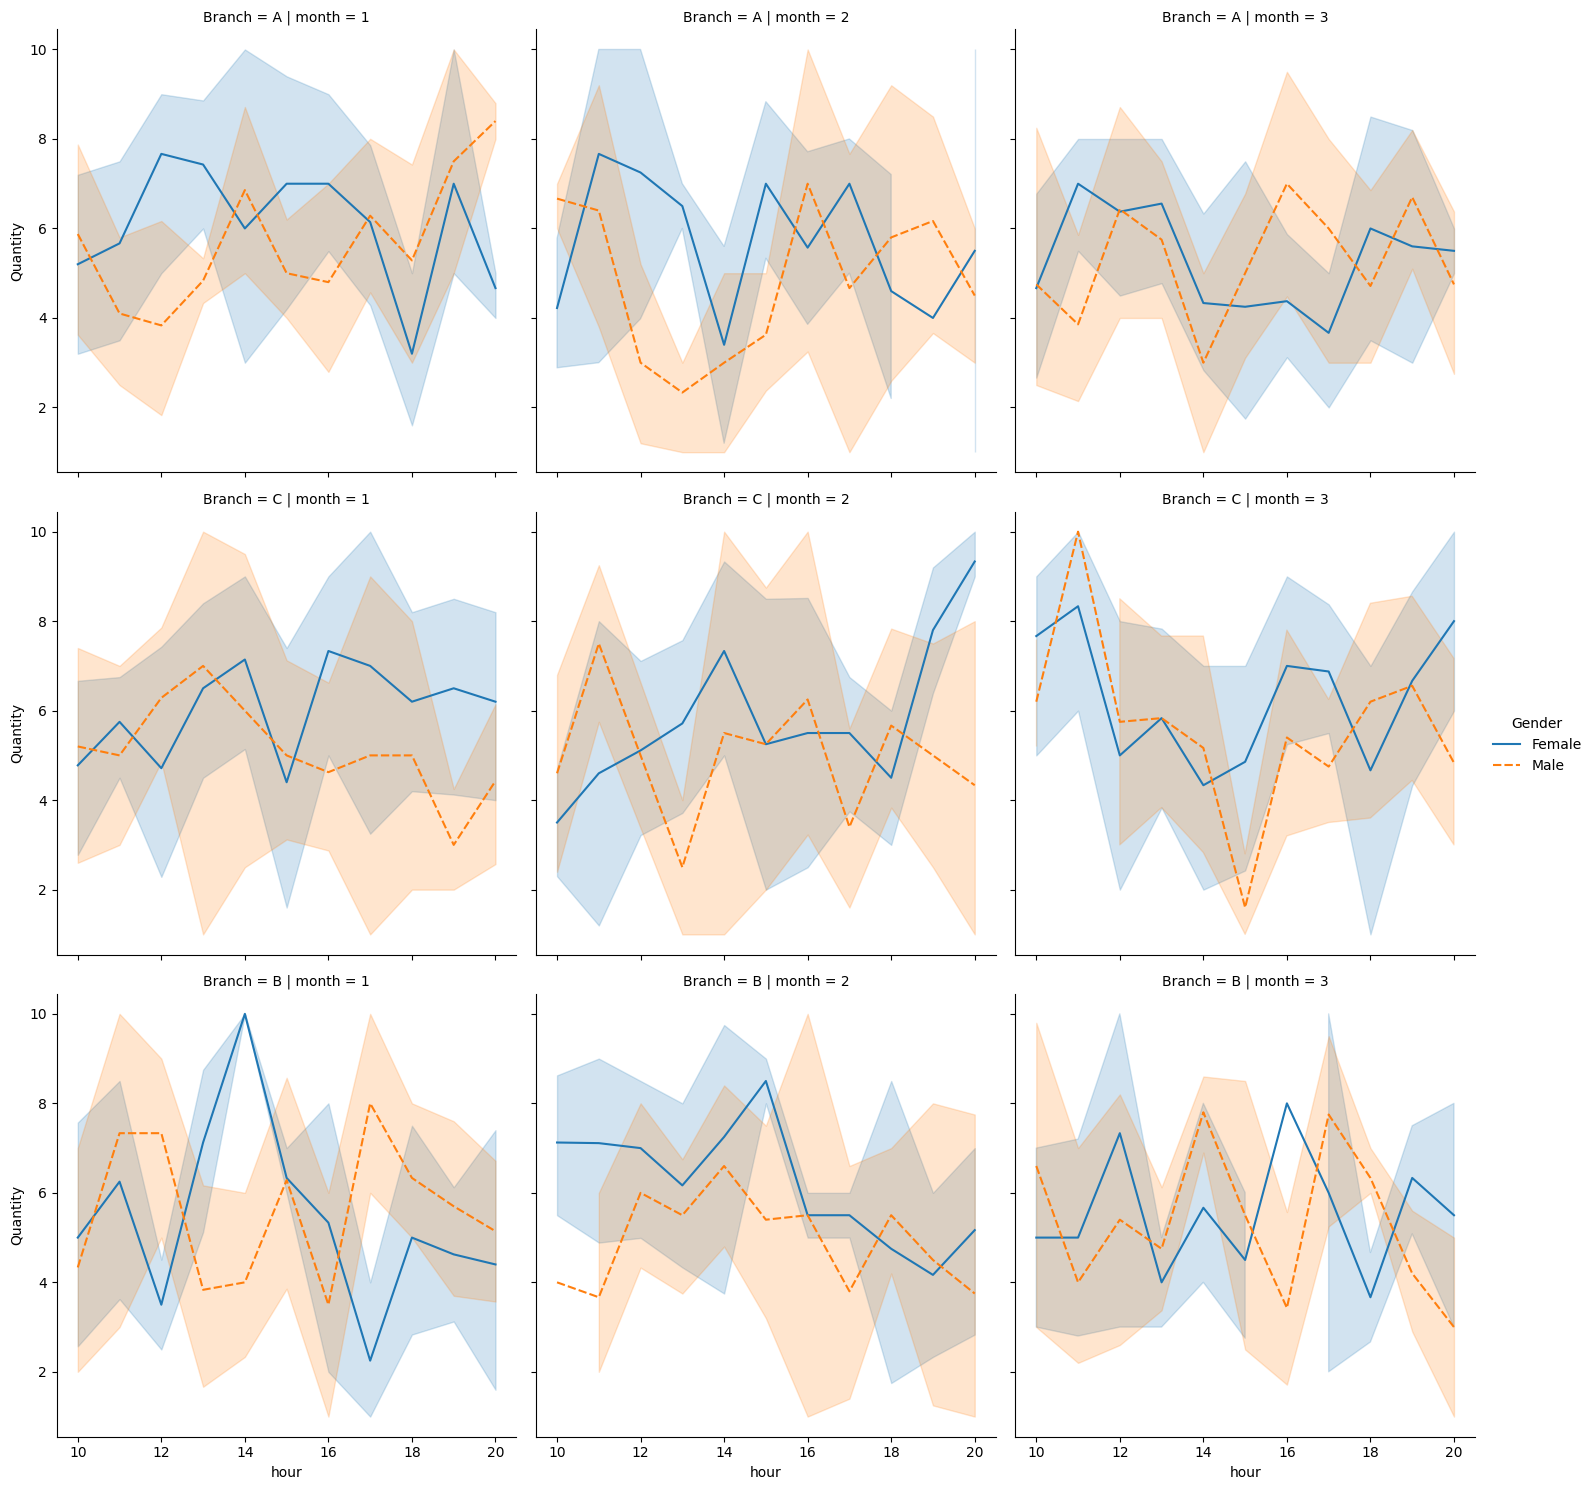

In [62]:
return_rel_plot(x_col='hour',y_col='Quantity',col_name='month',row_name='Branch',rel_type='line',hue_name='Gender',style_name='Gender')

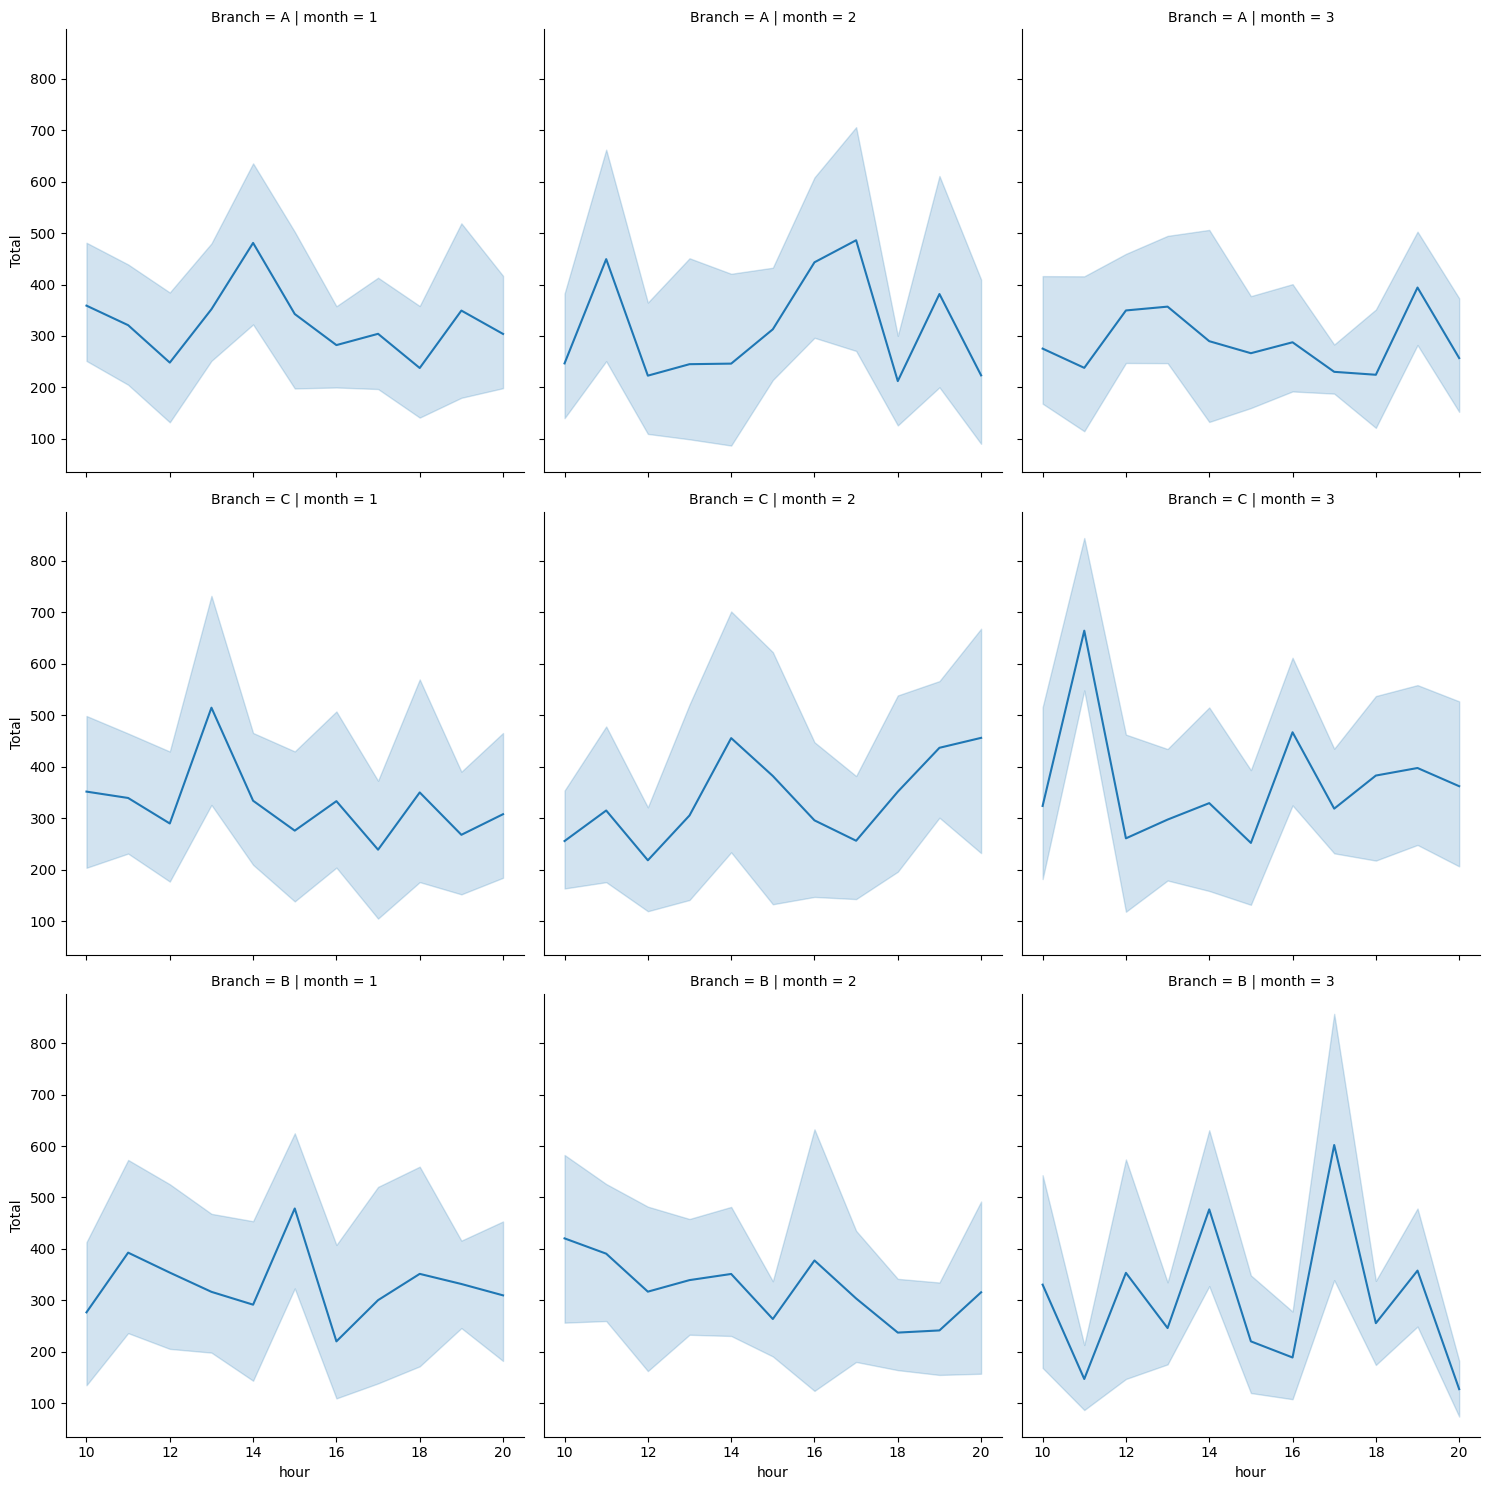

In [63]:
return_rel_plot(x_col='hour',y_col='Total',col_name='month',row_name='Branch',rel_type='line')

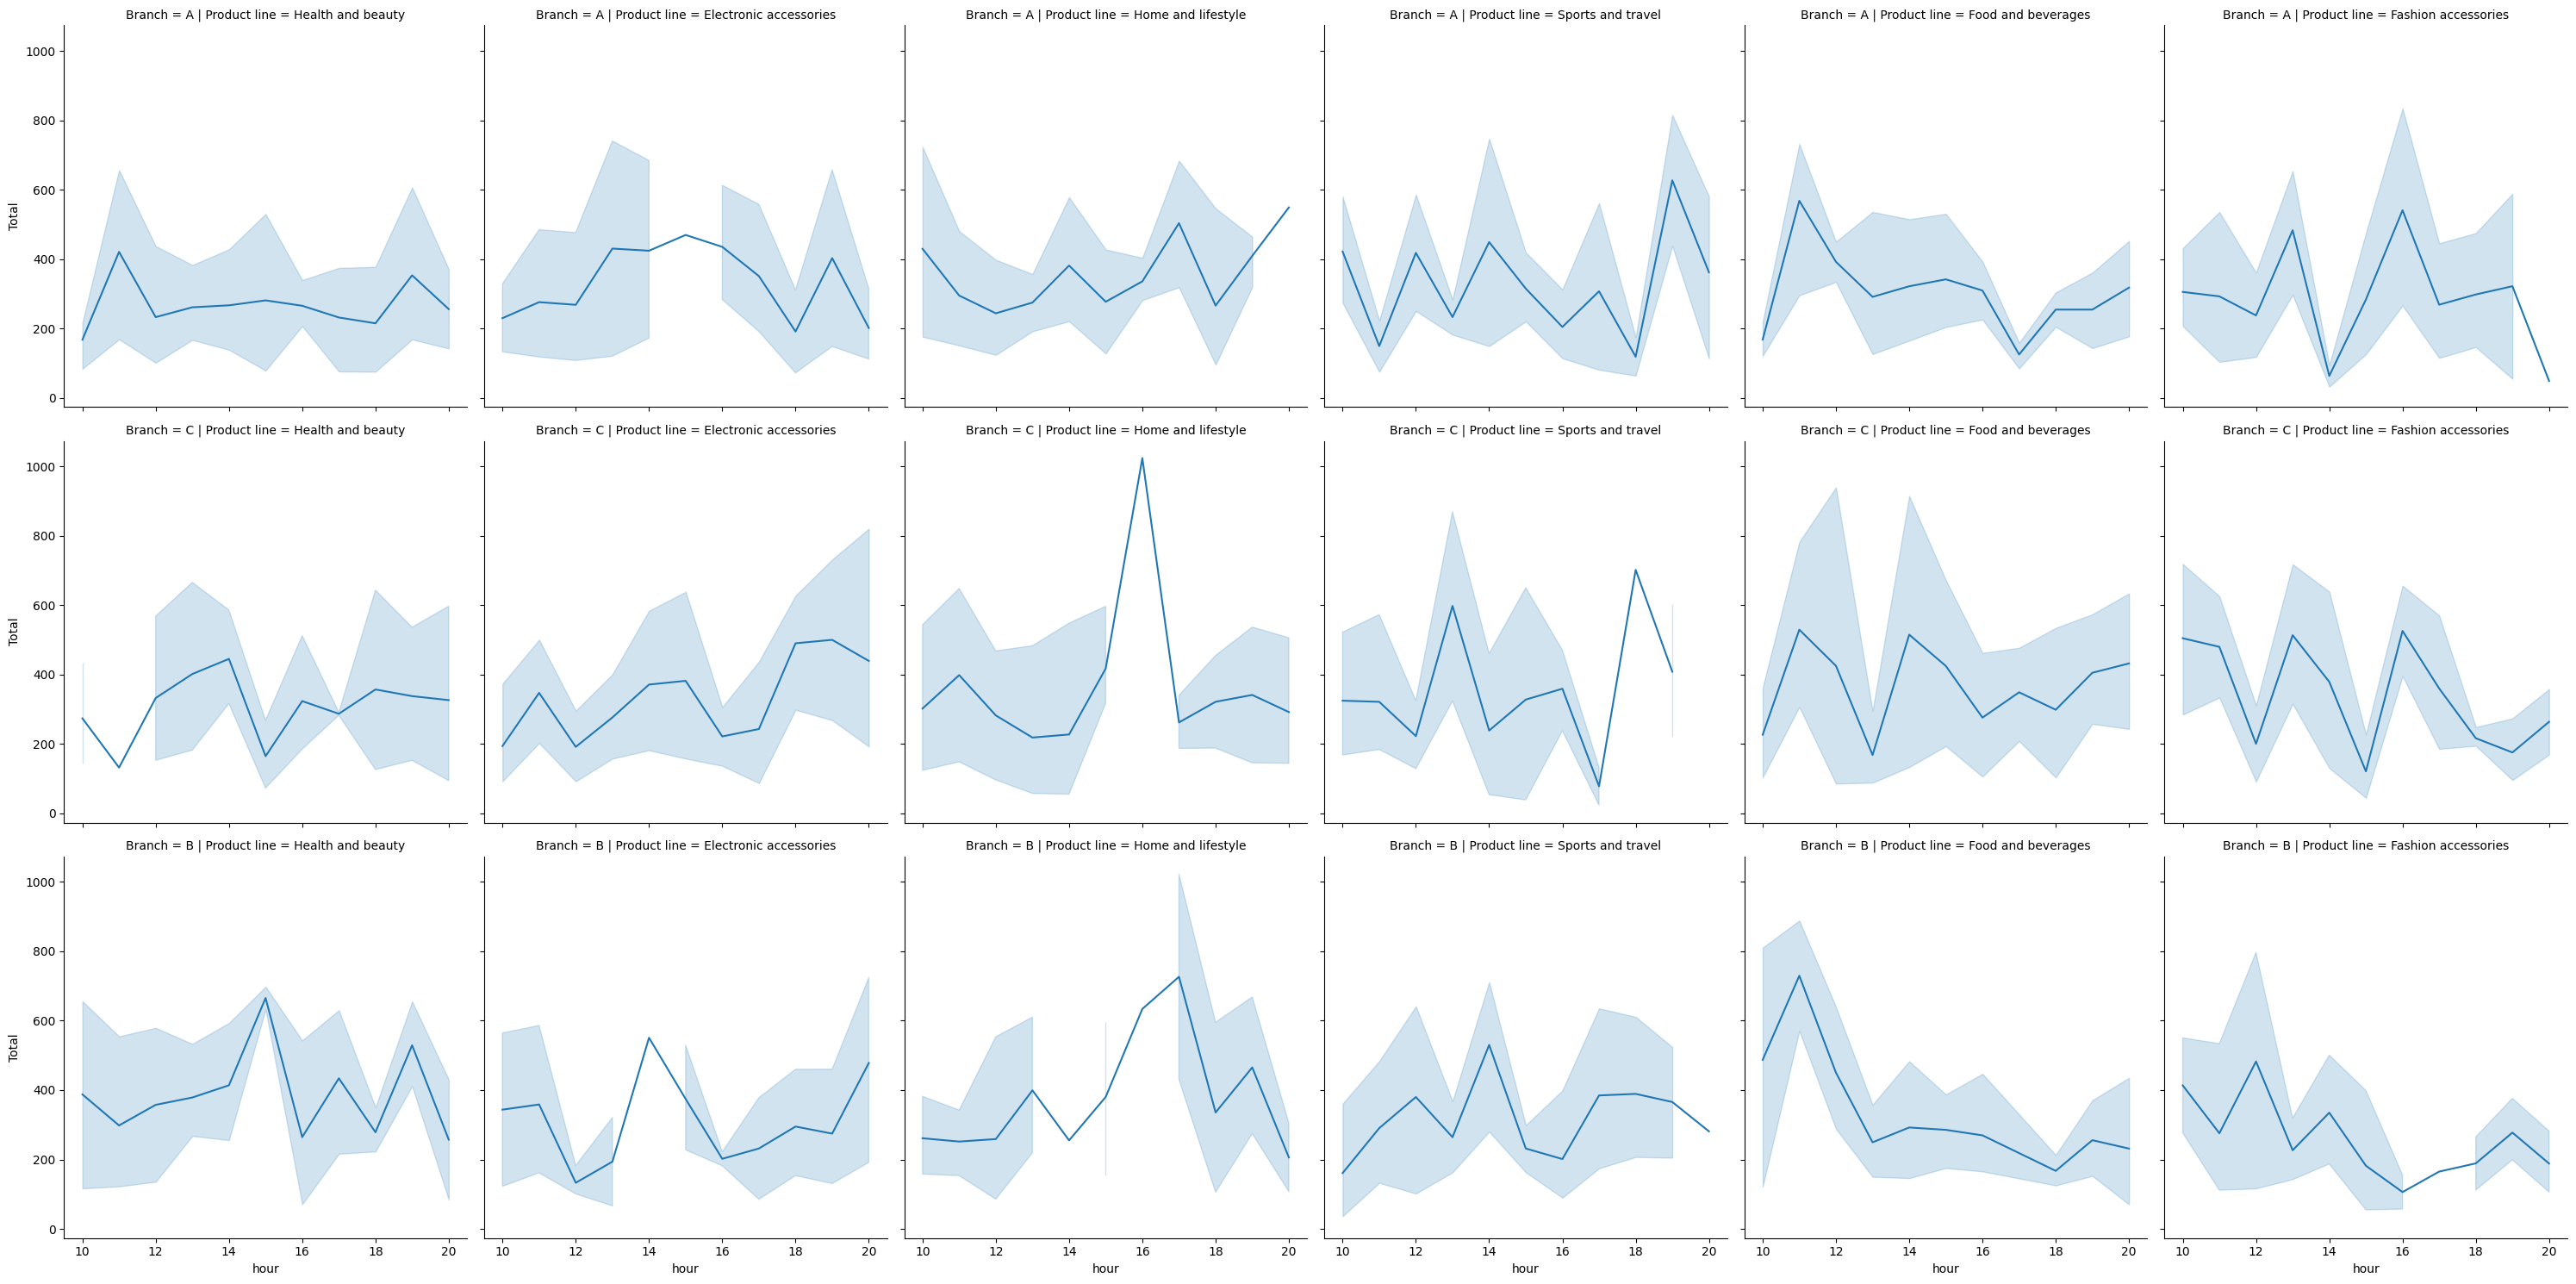

In [65]:
return_rel_plot(x_col='hour',y_col='Total',col_name='Product line',row_name='Branch',rel_type='line')

<AxesSubplot: xlabel='Quantity', ylabel='Product line'>

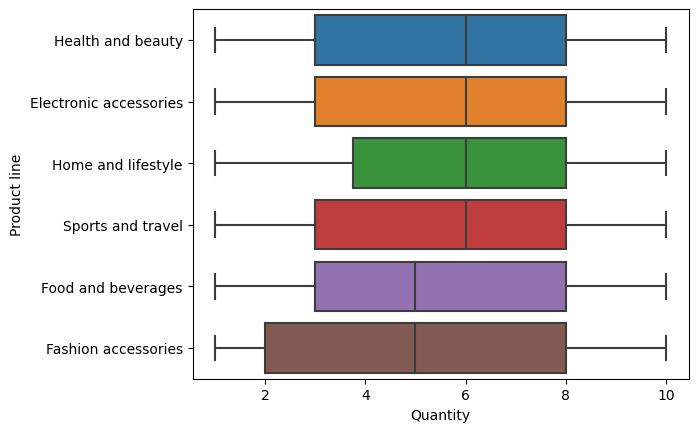

In [66]:
return_boxplot('Quantity','Product line')

<AxesSubplot: xlabel='Product line', ylabel='count'>

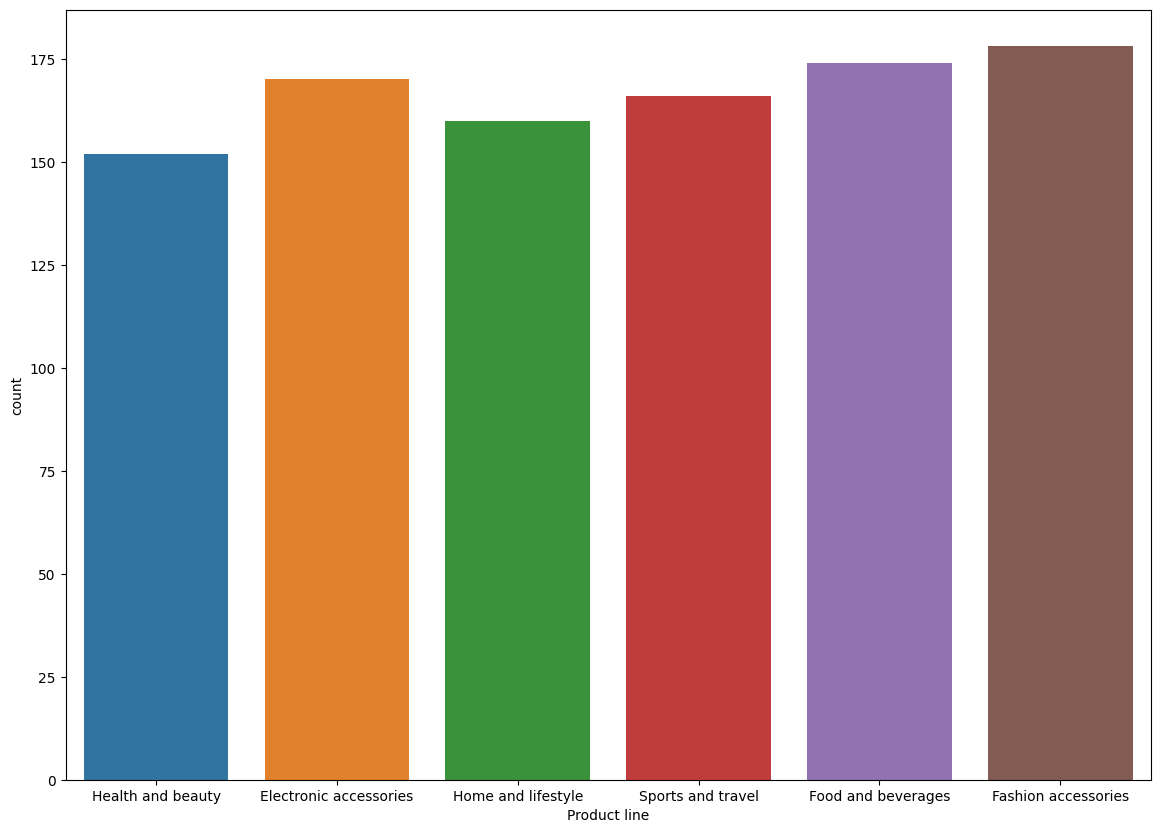

In [70]:
plt.figure(figsize=(14,10))
return_countplot('Product line')

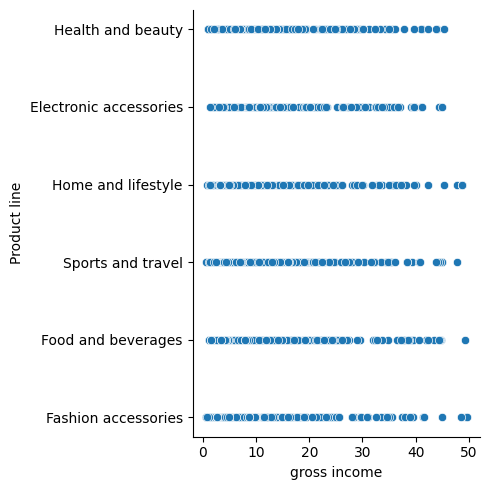

In [71]:
return_rel_plot('gross income','Product line',rel_type='scatter')

<AxesSubplot: xlabel='Payment', ylabel='count'>

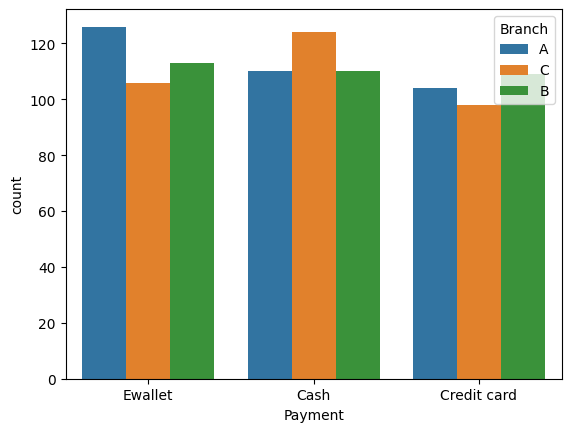

In [72]:
return_countplot('Payment',hue_name='Branch')

In [73]:
sales.groupby('Customer type')['Total'].sum()
#type: series

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

In [74]:
sales.groupby('Customer type').agg({'Total': 'sum'})
#type: dataframe

,Total
Customer type,
Member,164223.444
Normal,158743.305


<AxesSubplot: xlabel='Customer type', ylabel='Rating'>

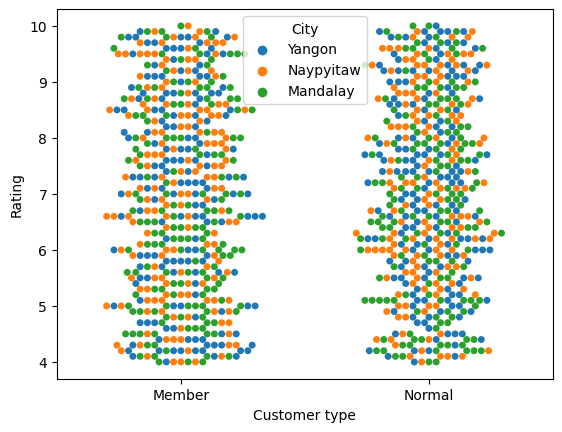

In [76]:
sns.swarmplot(x='Customer type', y='Rating', data=sales, hue= 'City')

In [77]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
from wordcloud import WordCloud

In [79]:
' '.join(sales['Product line'])

'Health and beauty Electronic accessories Home and lifestyle Health and beauty Sports and travel Electronic accessories Electronic accessories Home and lifestyle Health and beauty Food and beverages Fashion accessories Electronic accessories Electronic accessories Food and beverages Health and beauty Sports and travel Health and beauty Sports and travel Food and beverages Home and lifestyle Electronic accessories Health and beauty Home and lifestyle Electronic accessories Sports and travel Home and lifestyle Fashion accessories Fashion accessories Food and beverages Health and beauty Fashion accessories Sports and travel Sports and travel Health and beauty Food and beverages Sports and travel Sports and travel Electronic accessories Health and beauty Home and lifestyle Home and lifestyle Home and lifestyle Sports and travel Food and beverages Health and beauty Electronic accessories Health and beauty Food and beverages Electronic accessories Fashion accessories Food and beverages Food 

(-0.5, 1919.5, 1079.5, -0.5)

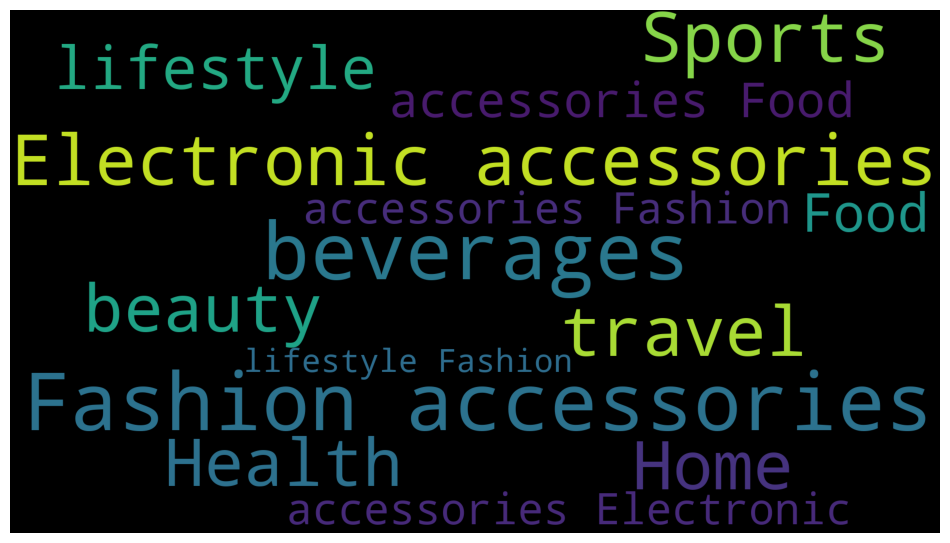

In [83]:
plt.figure(figsize=(12,8))
Wordcloud=WordCloud(width=1920, height=1080).generate(' '.join(sales['Product line']))
plt.imshow(Wordcloud)
plt.axis('off')